In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
samples_per_class = 5000
no_of_classes = 3
directory = "/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Multi-class/Signal_HIDDEN_in_strain_data/Signal_NOT_WHITENED/Test 5/data/"

In [ ]:
noise_df = pd.read_csv(directory + "Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)

data_BBH_df = pd.read_csv(directory + "Final_BBH_Merged_Noise_Signal.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)


data_BNS_df = pd.read_csv(directory + "Final_BNS_Merged_Noise_Signal.csv", header=None)
data_BNS = data_BNS_df.values.astype(float)

In [ ]:
X = np.concatenate((noise, data_BBH, data_BNS), axis=0)
print(X.shape)

(15000, 16384)


In [ ]:
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
noise = None
data_BBH = None
data_BNS = None

In [ ]:
X *= 1e19
print(X)

# X *= 1e18
# print(X)

# X *= 1e17
# print(X)

[[  8.65473393  -4.32729419  -3.26525906 ...   0.83292354  -3.52991081
   -7.59845202]
 [  3.87703089  -5.71315878  10.08591533 ...  10.26368544  17.05250296
    0.23558046]
 [  4.72886208  13.64311238  -9.2637261  ... -11.81785379 -14.40443602
   -7.49923767]
 ...
 [ -1.3682779    3.32131249  -1.45307157 ...  -3.26014527  14.0182199
    2.99613838]
 [  3.97594363  -5.79762639   1.94107332 ...  -0.38252231  12.78447127
    3.8614071 ]
 [-17.35933092   2.04440358  -9.3067805  ...   0.53713142  -5.9852591
    1.00235778]]


In [ ]:
X = np.expand_dims(X, axis=-1)
print(X.shape)

(15000, 16384, 1)


In [ ]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=1) 

In [ ]:
print(X_train.shape, y_train.shape)

(14999, 16384, 1) (14999, 3)


In [ ]:
model = Sequential()

model.add(Conv1D(16, 16, input_shape = (16384,1)))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(32, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(64, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(128, 8))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
118/118 [==============================] - 26s 143ms/step - loss: 4.5512 - accuracy: 0.5326
Epoch 2/5
118/118 [==============================] - 17s 142ms/step - loss: 0.2757 - accuracy: 0.9075
Epoch 3/5
118/118 [==============================] - 17s 141ms/step - loss: 0.0494 - accuracy: 0.9847
Epoch 4/5
118/118 [==============================] - 17s 141ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 5/5
118/118 [==============================] - 17s 141ms/step - loss: 0.0201 - accuracy: 0.9937


In [ ]:
X_train = None

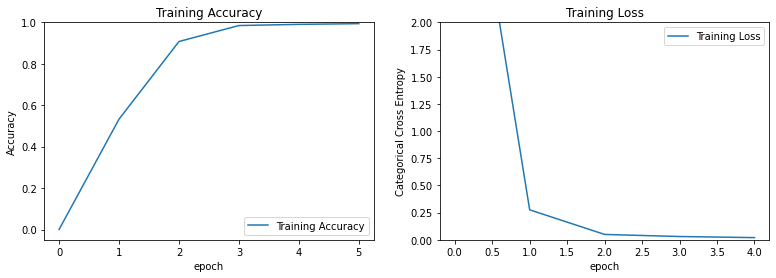

In [ ]:
acc = [0.] + history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

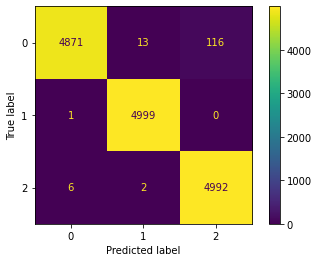

Precision: 0.991
Recall: 0.991
F1-Score: 0.991


In [ ]:
pred = model.predict(X)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y, axis = 1)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()
plt.show()

precision = np.diag(cm) / np.sum(cm, axis = 0)
precision = sum(precision)/3
print('Precision: %.3f' % precision)

recall = np.diag(cm) / np.sum(cm, axis = 1)
recall = sum(recall)/3
print('Recall: %.3f' % recall)

score = (2*precision*recall)/(precision + recall)
print('F1-Score: %.3f' % score)

In [ ]:
# model.save(directory + "model_trial_3.h5")